# Segunda Entrega:
# Turma de Terças: 09/05/2023 | Turma de Sextas: 12/05/2023

## Objetivos:

1. Apresentar análise exploratória dos dados selecionados
2. Desenvolver um relatório com as análises realizadas
3. Tirar conclusões sobre os dados expostos

## Tarefas:

1. Análise Exploratória
  - Desenvolver gráficos, histogramas, tabelas e outros recursos visuais para demonstrar os dados
  - Identificar as informações relevantes que auxiliem a responder as perguntas levantadas
  - Explorar as características e distribuições dos dados para fins de entendimento e identificação de tendências ou padrões
  - Utilizar ferramentas de visualização, como Power BI, Tableau, Looker, QlikView, Jupyter Notebook ou Google Colab

2. Desenvolvimento do Relatório:
  - Descrever cada item adicionado ao relatório, explicando a relevância para a análise dos dados e as perguntas levantadas
  - Apresentar as conclusões tiradas dos dados analisados
  - Utilizar o formato de relatório para apresentação das análises, podendo ser em formato de texto, planilha ou apresentação de slides.
  - Nessa etapa não haverá apresentação.
  - Divisão de pontuação para avaliação do relatório disponível no Github do grupo:
3. O relatório será avaliado de acordo com a seguinte divisão de pontuação:
  - Análise exploratória (4 pontos)
  - Qualidade da apresentação visual dos dados (2 pontos)
  - Identificação das informações relevantes e conclusões tiradas (2 pontos)
  - Qualidade do relatório e da apresentação das análises (2 pontos)

In [17]:
merge = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')

merge['SigTipoGeracao'].replace({
    'UTN': 'Usina Termonuclear',
    'UTE': 'Usina Termelétrica',
    'UHE': 'Usina Hidrelétrica',
    'UFV': 'Central Geradora Solar Fotovoltaica',
    'PCH': 'Pequena Central Hidrelétrica',
    'EOL': 'Central Geradora Eólica',
    'CGU': 'Central Geradora Undi-elétrica',
    'CGH': 'Central Geradora Hidrelétrica'
}, inplace=True)

somas = merge.groupby(['SigUFPrincipal', 'SigTipoGeracao']).agg({'MdaPotenciaOutorgadaKw': 'sum'})

somas['MdaPotenciaOutorgadaKw'] = pd.to_numeric(somas['MdaPotenciaOutorgadaKw'])

maiores_valores = somas.groupby(['SigUFPrincipal'])['MdaPotenciaOutorgadaKw'].idxmax()

maiores_geradores = somas.loc[maiores_valores]

maiores_geradores


,,MdaPotenciaOutorgadaKw
SigUFPrincipal,SigTipoGeracao,
AC,Usina Termelétrica,142170.00
AL,Central Geradora Solar Fotovoltaica,531624.00
AM,Usina Termelétrica,2216523.80
AP,Usina Hidrelétrica,941950.00
BA,Central Geradora Eólica,16953370.64
CE,Central Geradora Solar Fotovoltaica,8463056.00
DF,Usina Hidrelétrica,30000.00
ES,Usina Termelétrica,1221222.40
GO,Usina Hidrelétrica,5436627.00


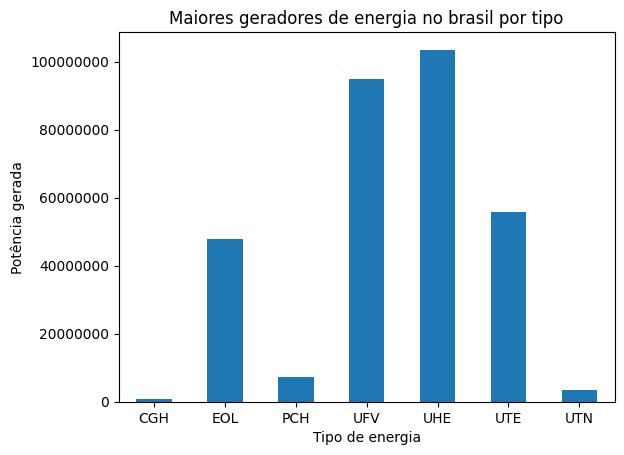

In [18]:
merge = pd.merge(fato_geracao, dim_empreendimentos, left_on='Id_empreendimento', right_on='id')
pd.options.display.float_format = '{:.2f}'.format
grouped = merge.groupby('SigTipoGeracao')['MdaPotenciaOutorgadaKw'].sum()

grouped.plot.bar(rot=0)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("Maiores geradores de energia no brasil por tipo")
plt.xlabel("Tipo de energia")
plt.ylabel("Potência gerada")
plt.show()

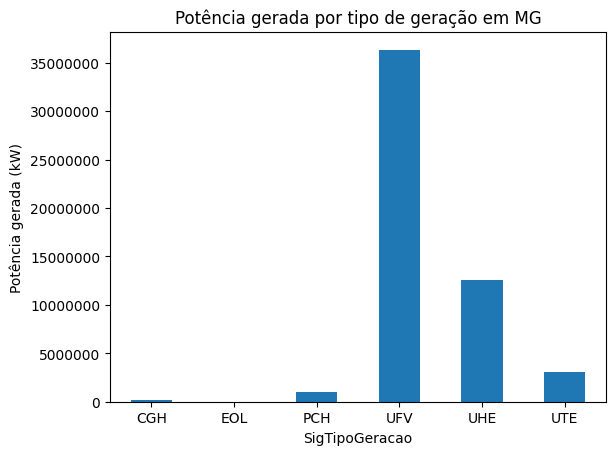

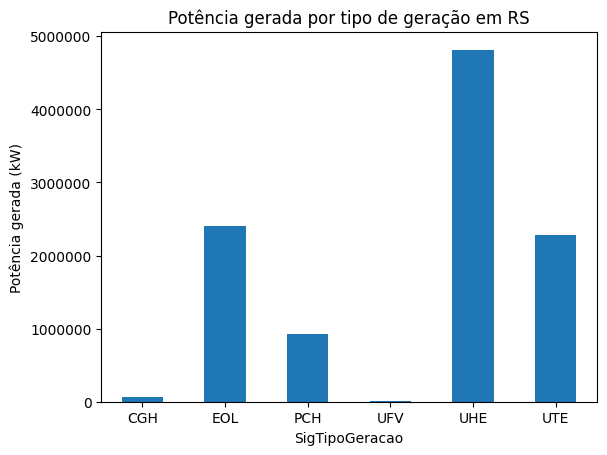

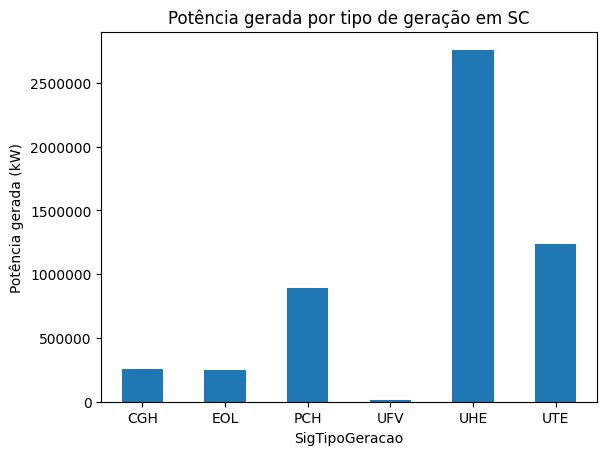

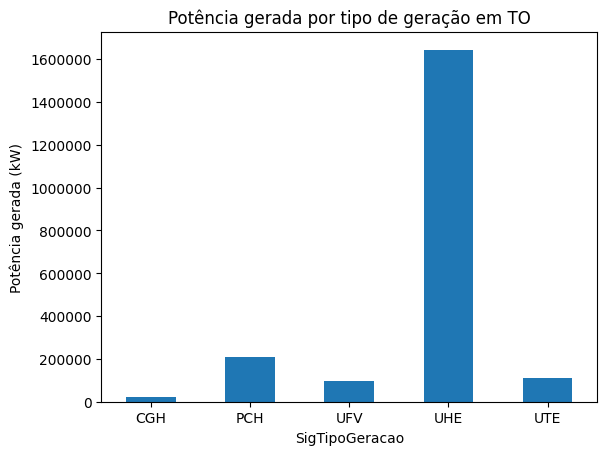

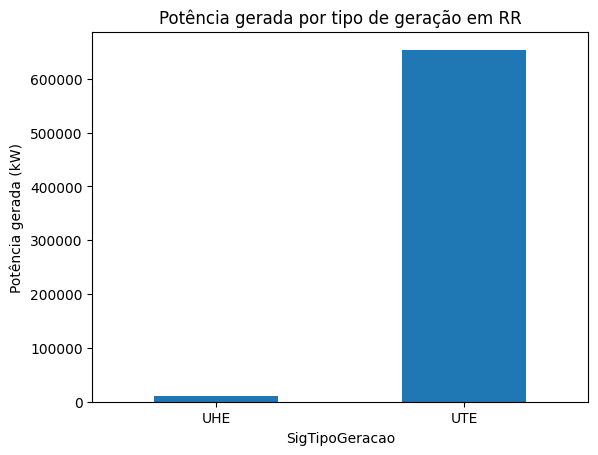

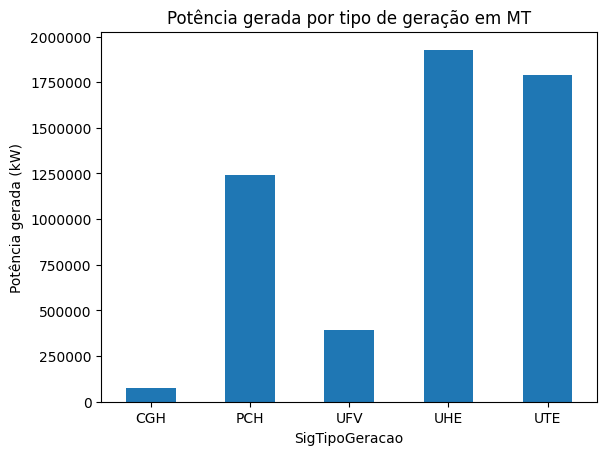

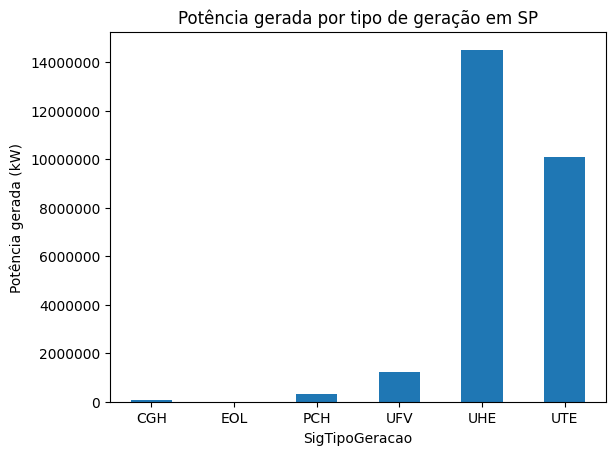

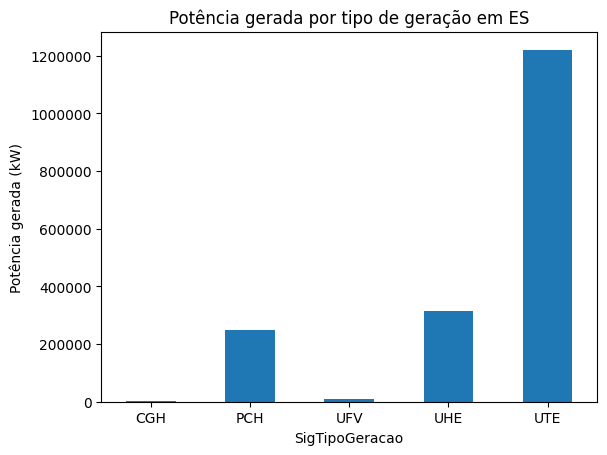

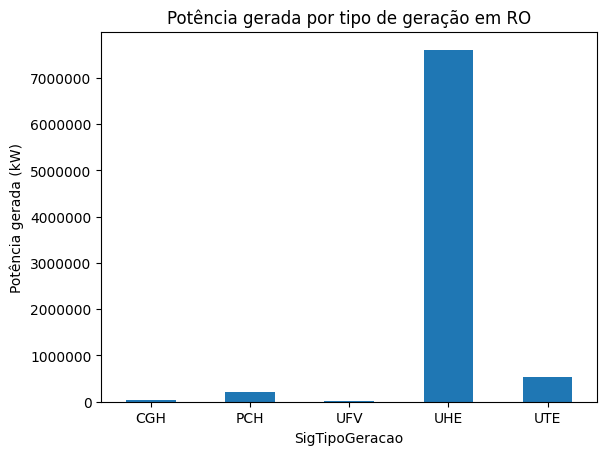

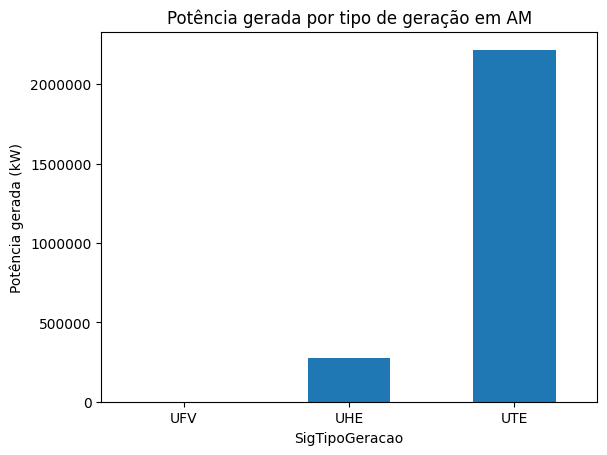

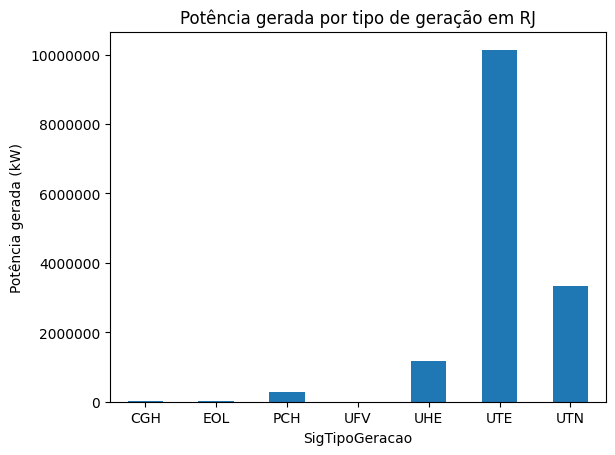

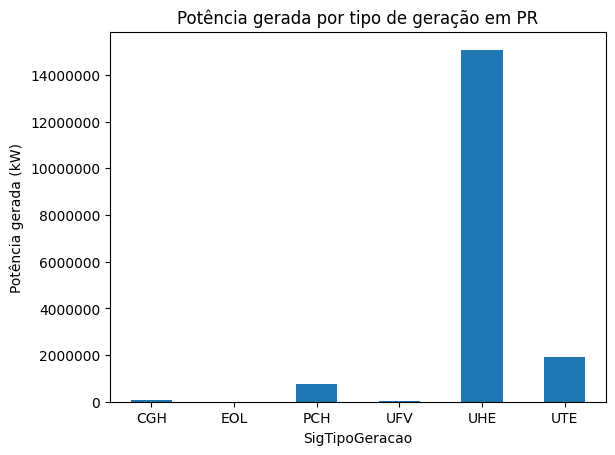

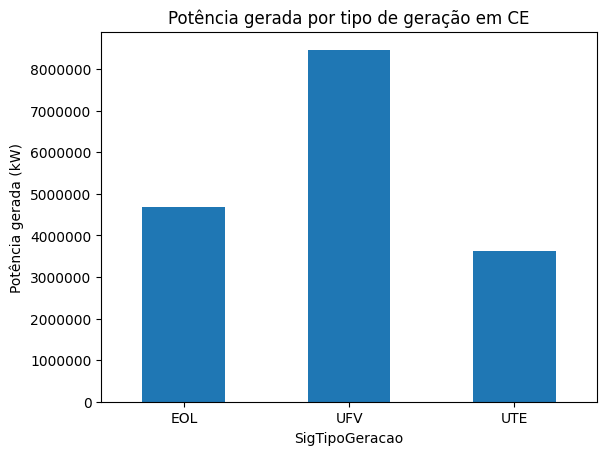

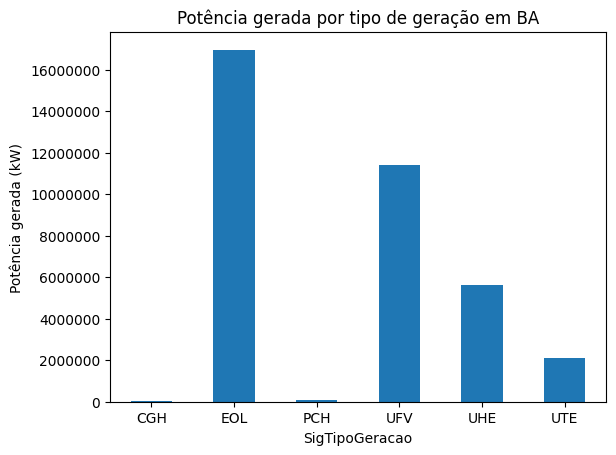

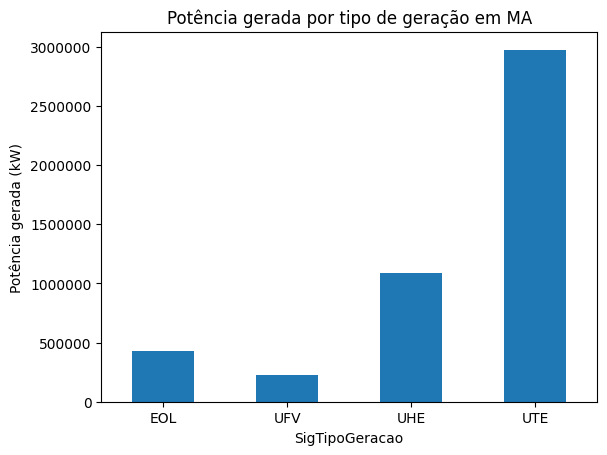

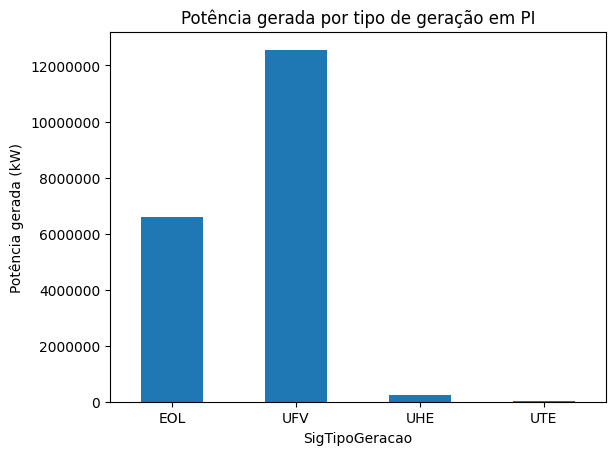

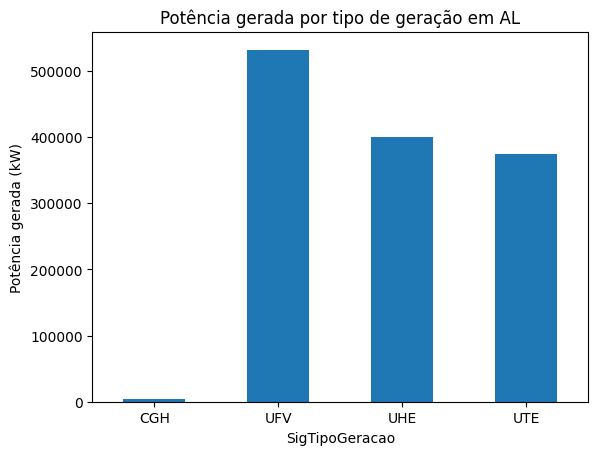

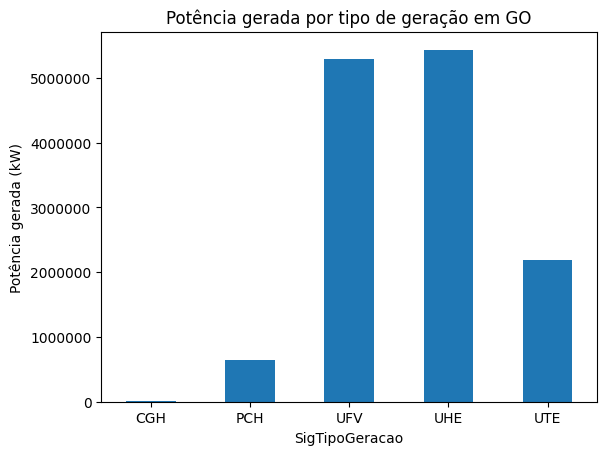

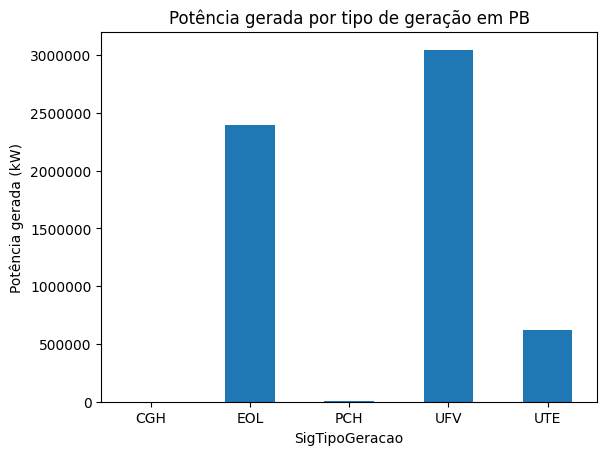

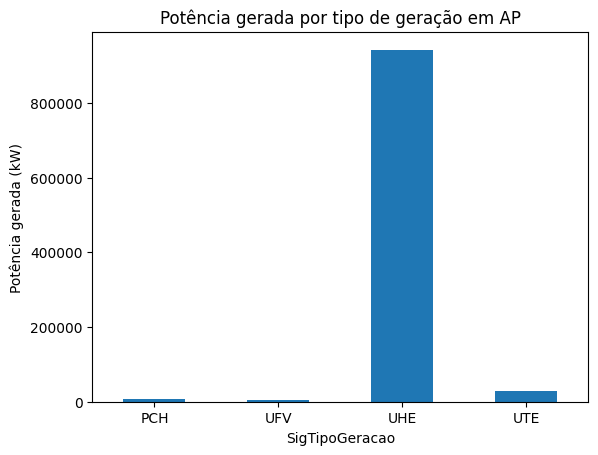

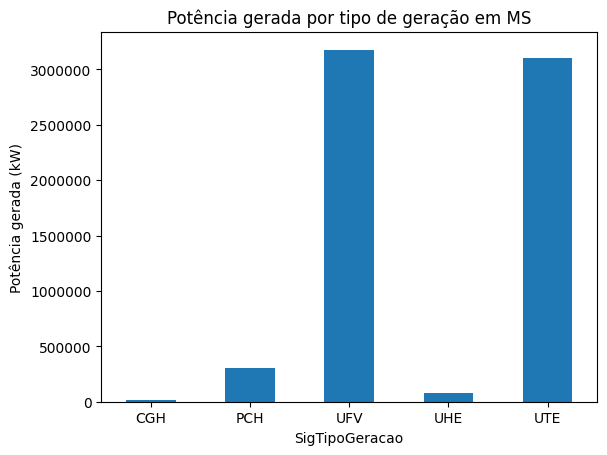

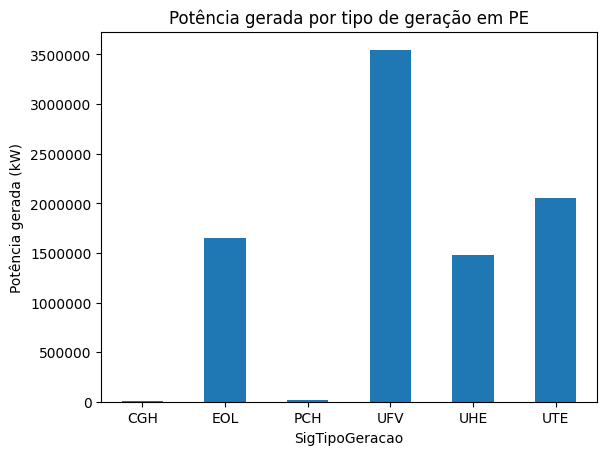

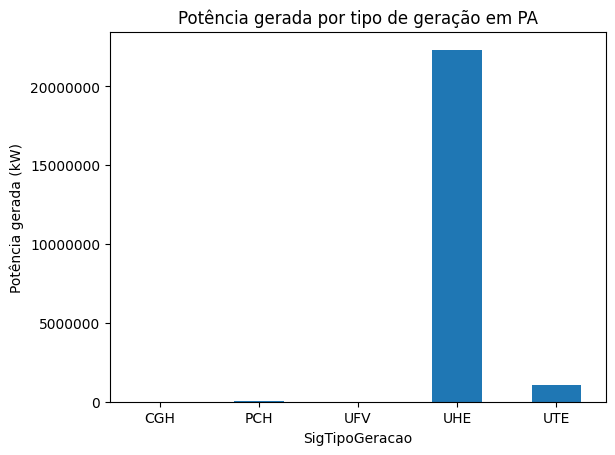

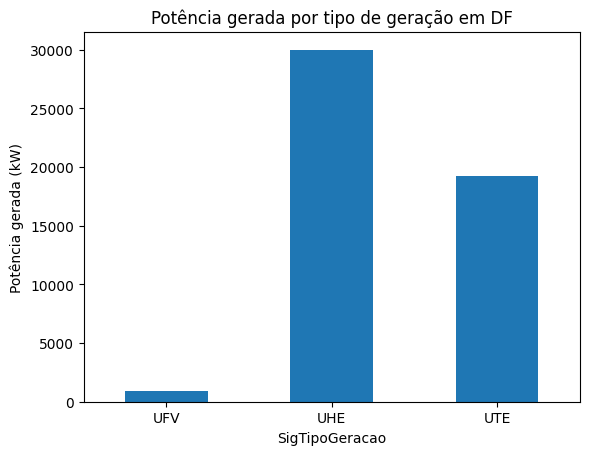

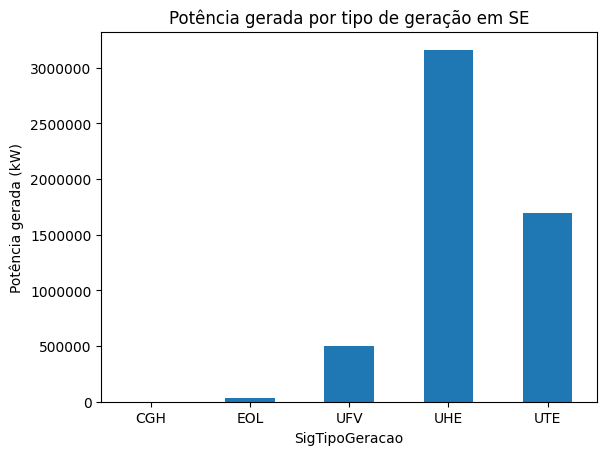

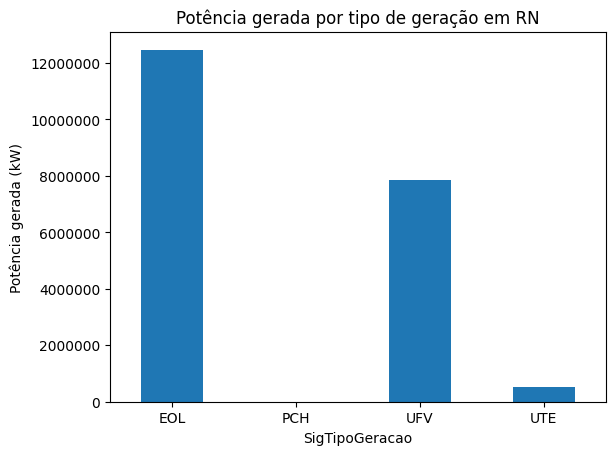

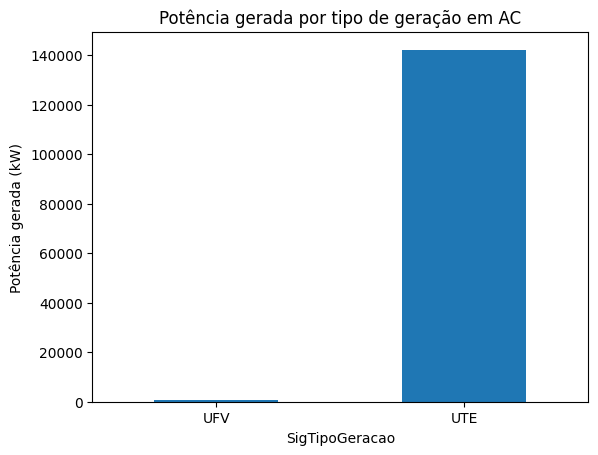

In [19]:
ufs = merge['SigUFPrincipal'].unique()
for uf in ufs:
    data = merge[merge['SigUFPrincipal'] == uf]
    
    grouped = data.groupby('SigTipoGeracao')['MdaPotenciaOutorgadaKw'].sum()
    
    fig, ax = plt.subplots()
    grouped.plot.bar(rot=0, ax=ax)
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    ax.set_title(f'Potência gerada por tipo de geração em {uf}')
    ax.set_ylabel('Potência gerada (kW)')

    plt.show()